# Data Analysis
See README for observations.

## References
https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/

https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

https://towardsdatascience.com/basic-binary-sentiment-analysis-using-nltk-c94ba17ae386 

https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis 

https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643

Pew Research Center (2014). “Wave 1 American trends panel: Mar 19, 2014-Apr 29, 2014.” Washington, D.C. https://www.journalism.org/2014/10/21/political-polarization-media-habits/. 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Increase the quality and resolution of our charts so we can copy/paste or justdirectly save from here.
# See: https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

# You can also just do this in Colab/Jupyter, some "magic":
# %config InlineBackend.figure_format='retina'

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
# need to run these commands the very first time you use these packages
# nltk.download('stopwords') 
# nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Set style for all graphs
plt.style.use('fivethirtyeight')

In [3]:
# Read in csv as dataframe
df1 = pd.read_csv('../data_cleaning/final_cleaned_dataset.csv')
df1

Keyword               Source                                 Author  \
0     immigrant  The Washington Post                            Nick Miroff   
1     immigrant  The Washington Post            Nick Miroff, Devlin Barrett   
2     immigrant  The Washington Post                            Tim Elfrink   
3     immigrant  The Washington Post  James A. McCann, Michael Jones-Correa   
4     immigrant  The Washington Post                           Steven Moore   
...         ...                  ...                                    ...   
1472   refugees                  CNN             Shannon Liao, CNN Business   
1473   refugees                  CNN              Opinion by Jill Filipovic   
1474   refugees                  CNN            Opinion by Amanda Mattingly   
1475   refugees                  CNN          Opinion by Akyaaba Addai-Sebo   
1476   refugees                  CNN                By Jessie Gretener, CNN   

                                                  Title  \
0     Hospital where activists say ICE detainees wer...   
1     ICE preparing targeted arrests in ‘sanctuary c...   
2     ‘They’re still not taking this seriously’: Whi...   
3     Trump’s attacks prompted Latino immigrants to ...   
4     ICE is accused of sterilizing detainees. That ...   
...                                                 ...   
1472  'Star Wars: Squadrons' lets players pilot thei...   
1473  With a virtual debate America would win and Tr...   
1474                       Biden is no friend to Maduro   
1475  Black children must be able to believe in them...   
1476  'They've forgotten us': Thousands of Australia...   

                                                    URL  \
0     https://www.washingtonpost.com/immigration/ice...   
1     https://www.washingtonpost.com/immigration/tru...   
2     https://www.washingtonpost.com/nation/2020/09/...   
3     https://www.washingtonpost.com/politics/2020/1...   
4     https://www.washingtonpost.com/politics/2020/0...   
...                                                 ...   
1472  https://www.cnn.com/2020/10/02/tech/star-wars-...   
1473  https://www.cnn.com/2020/10/08/opinions/donald...   
1474  https://www.cnn.com/2020/10/13/opinions/biden-...   
1475  https://www.cnn.com/2020/10/13/opinions/uk-bla...   
1476  https://www.cnn.com/travel/article/australians...   

                                                   Text             Published  \
0     According to a complaint filed last week by im...  2020-09-22T20:10:00Z   
1     Chad Wolf, acting secretary of the Department ...  2020-09-29T22:37:00Z   
2     Ms. Wootens whistleblowing disclosures confirm...  2020-09-15T10:39:00Z   
3     How has all this affected Latino immigrants, t...  2020-10-01T11:00:12Z   
4     Forced sterilization in the U.S.\r\nSince the ...  2020-09-25T11:00:00Z   
...                                                 ...                   ...   
1472  New York (CNN Business)The multibillion dollar...  2020-10-02T18:03:24Z   
1473  Jill Filipovic is a journalist based in New Yo...  2020-10-09T03:42:38Z   
1474  Amanda Mattingly is a Truman National Security...  2020-10-13T17:38:20Z   
1475  After visiting the US in the 1970s, Akyaaba Ad...  2020-10-13T09:28:37Z   
1476  Jessie Gretener, CNNPublished 14th September 2...  2020-09-14T09:38:34Z   

      compound score  negative score  positive score  neutral score  
0             0.0000           0.000           0.000          1.000  
1            -0.4404           0.182           0.000          0.818  
2            -0.1531           0.198           0.126          0.676  
3            -0.4404           0.195           0.000          0.805  
4            -0.6369           0.286           0.000          0.714  
...              ...             ...             ...            ...  
1472         -0.5574           0.310           0.000          0.690  
1473          0.2732           0.186           0.262          0.552  
1474          0.2500           0.234  

## Data Processing
Add in political bias score and create sentiment categories based on compound sentiment scores.

In [4]:
# Add categories for overall sentiment based on compound sentiment scores
# 0 = neutral, 1 = positive, -1 = negative
df1['Overall Sentiment'] = 0
df1.loc[df1['compound score'] > 0.2, 'Overall Sentiment'] = 1 
df1.loc[df1['compound score'] < -0.2, 'Overall Sentiment'] = -1 
df1

Keyword               Source                                 Author  \
0     immigrant  The Washington Post                            Nick Miroff   
1     immigrant  The Washington Post            Nick Miroff, Devlin Barrett   
2     immigrant  The Washington Post                            Tim Elfrink   
3     immigrant  The Washington Post  James A. McCann, Michael Jones-Correa   
4     immigrant  The Washington Post                           Steven Moore   
...         ...                  ...                                    ...   
1472   refugees                  CNN             Shannon Liao, CNN Business   
1473   refugees                  CNN              Opinion by Jill Filipovic   
1474   refugees                  CNN            Opinion by Amanda Mattingly   
1475   refugees                  CNN          Opinion by Akyaaba Addai-Sebo   
1476   refugees                  CNN                By Jessie Gretener, CNN   

                                                  Title  \
0     Hospital where activists say ICE detainees wer...   
1     ICE preparing targeted arrests in ‘sanctuary c...   
2     ‘They’re still not taking this seriously’: Whi...   
3     Trump’s attacks prompted Latino immigrants to ...   
4     ICE is accused of sterilizing detainees. That ...   
...                                                 ...   
1472  'Star Wars: Squadrons' lets players pilot thei...   
1473  With a virtual debate America would win and Tr...   
1474                       Biden is no friend to Maduro   
1475  Black children must be able to believe in them...   
1476  'They've forgotten us': Thousands of Australia...   

                                                    URL  \
0     https://www.washingtonpost.com/immigration/ice...   
1     https://www.washingtonpost.com/immigration/tru...   
2     https://www.washingtonpost.com/nation/2020/09/...   
3     https://www.washingtonpost.com/politics/2020/1...   
4     https://www.washingtonpost.com/politics/2020/0...   
...                                                 ...   
1472  https://www.cnn.com/2020/10/02/tech/star-wars-...   
1473  https://www.cnn.com/2020/10/08/opinions/donald...   
1474  https://www.cnn.com/2020/10/13/opinions/biden-...   
1475  https://www.cnn.com/2020/10/13/opinions/uk-bla...   
1476  https://www.cnn.com/travel/article/australians...   

                                                   Text             Published  \
0     According to a complaint filed last week by im...  2020-09-22T20:10:00Z   
1     Chad Wolf, acting secretary of the Department ...  2020-09-29T22:37:00Z   
2     Ms. Wootens whistleblowing disclosures confirm...  2020-09-15T10:39:00Z   
3     How has all this affected Latino immigrants, t...  2020-10-01T11:00:12Z   
4     Forced sterilization in the U.S.\r\nSince the ...  2020-09-25T11:00:00Z   
...                                                 ...                   ...   
1472  New York (CNN Business)The multibillion dollar...  2020-10-02T18:03:24Z   
1473  Jill Filipovic is a journalist based in New Yo...  2020-10-09T03:42:38Z   
1474  Amanda Mattingly is a Truman National Security...  2020-10-13T17:38:20Z   
1475  After visiting the US in the 1970s, Akyaaba Ad...  2020-10-13T09:28:37Z   
1476  Jessie Gretener, CNNPublished 14th September 2...  2020-09-14T09:38:34Z   

      compound score  negative score  positive score  neutral score  \
0             0.0000           0.000           0.000          1.000   
1            -0.4404           0.182           0.000          0.818   
2            -0.1531           0.198           0.126          0.676   
3            -0.4404           0.195           0.000          0.805   
4            -0.6369           0.286           0.000          0.714   
...              ...             ...             ...            ...   
1472         -0.5574           0.310           0.000          0.690   
1473          0.2732           0.186           0.262          0.552   
1474          0.2500         

In [5]:
# Political bias scores were derived from the Pew Research Center survey data
pol_bias_score = {'ABC News': -1.7, 'Al Jazeera English': -4.4, 'Bloomberg': -1.8, 'Breitbart News': 2.9, 'Buzzfeed': -3.5, 'CBS News': -1.6, 'CNN': -2.2, 'Fox News': 2, 'Google News': -1.3, 'MSNBC': -2.4, 'NBC News': -2.1, 'Politico': -3.5, 'The Huffington Post': -3.6, 'The Wall Street Journal': -0.25, 'The Washington Post': -3.7, 'USA Today': -1.3}

# Check that spelling is exactly the same for all source names
sources = df1['Source'].unique()
for source in sources:
    if source in pol_bias_score.keys():
        print("True")
    else:
        print(f'{source} is not scored')

True
True
True
True
True
True
True
True
True


In [6]:
# Add political bias scores to data frame and save to csv
df1['Source Bias'] = 0
for source in pol_bias_score:
    df1.loc[df1['Source'] == source, 'Source Bias'] = pol_bias_score[source]
    
df1.to_csv('finalnewsdataprocessed.csv', index=False)
df1.head()

Keyword               Source                                 Author  \
0  immigrant  The Washington Post                            Nick Miroff   
1  immigrant  The Washington Post            Nick Miroff, Devlin Barrett   
2  immigrant  The Washington Post                            Tim Elfrink   
3  immigrant  The Washington Post  James A. McCann, Michael Jones-Correa   
4  immigrant  The Washington Post                           Steven Moore   

                                               Title  \
0  Hospital where activists say ICE detainees wer...   
1  ICE preparing targeted arrests in ‘sanctuary c...   
2  ‘They’re still not taking this seriously’: Whi...   
3  Trump’s attacks prompted Latino immigrants to ...   
4  ICE is accused of sterilizing detainees. That ...   

                                                 URL  \
0  https://www.washingtonpost.com/immigration/ice...   
1  https://www.washingtonpost.com/immigration/tru...   
2  https://www.washingtonpost.com/nation/2020/09/...   
3  https://www.washingtonpost.com/politics/2020/1...   
4  https://www.washingtonpost.com/politics/2020/0...   

                                                Text             Published  \
0  According to a complaint filed last week by im...  2020-09-22T20:10:00Z   
1  Chad Wolf, acting secretary of the Department ...  2020-09-29T22:37:00Z   
2  Ms. Wootens whistleblowing disclosures confirm...  2020-09-15T10:39:00Z   
3  How has all this affected Latino immigrants, t...  2020-10-01T11:00:12Z   
4  Forced sterilization in the U.S.\r\nSince the ...  2020-09-25T11:00:00Z   

   compound score  negative score  positive score  neutral score  \
0          0.0000           0.000           0.000          1.000   
1         -0.4404           0.182           0.000          0.818   
2         -0.1531           0.198           0.126          0.676   
3         -0.4404           0.195           0.000          0.805   
4         -0.6369           0.286           0.000          0.714   

   Overall Sentiment  Source Bias  
0                  0         -3.7  
1                 -1         -3.7  
2                  0         -3.7  
3                 -1         -3.7  
4                 -1         -3.7

In [7]:
# TODO: Consider how political bias score is related to sentiment

In [8]:
# Read in processed CSV and save as DataFrame
df2 = pd.read_csv('finalnewsdataprocessed.csv')
df = df2[['Source', 
               'Source Bias', 
               'Author', 
               'Title', 
               'Overall Sentiment',
               'compound score', 
               'negative score', 
               'positive score', 
               'neutral score']]
df.sort_values(by='Source')

Source  Source Bias  \
738   Al Jazeera English         -4.4   
870   Al Jazeera English         -4.4   
871   Al Jazeera English         -4.4   
872   Al Jazeera English         -4.4   
873   Al Jazeera English         -4.4   
...                  ...          ...   
1316           USA Today         -1.3   
1317           USA Today         -1.3   
1318           USA Today         -1.3   
1077           USA Today         -1.3   
1086           USA Today         -1.3   

                                                 Author  \
738                                     Steve Chaggaris   
870                                    Mansur Mirovalev   
871                                          Al Jazeera   
872                                  Patrick Strickland   
873                                          Al Jazeera   
...                                                 ...   
1316  USA TODAY, David Jackson and Richard Wolf, USA...   
1317  USA TODAY, David Jackson and Richard Wolf, USA...   
1318  USA TODAY, Sean Rossman and Rachel Aretakis, U...   
1077            USA TODAY, Deirdre Shesgreen, USA TODAY   
1086             USA TODAY, Marco della Cava, USA TODAY   

                                                  Title  Overall Sentiment  \
738   Analysis: US election 'October surprise' comes...                  1   
870   Nagorno-Karabakh: Historical grievances with d...                 -1   
871   Science vs humanities in Australia’s universit...                  0   
872   How a Greek reporter could help put neo-Nazis ...                  1   
873   How a Bollywood star’s death case took a ‘miso...                 -1   
...                                                 ...                ...   
1316  Trump is leaning toward Amy Coney Barrett as n...                  1   
1317  Trump embraces political battle with pick of A...                  1   
1318  Post-debate, election updates: Trump, who stil...                 -1   
1077  Trump administration slashes refugee program a...                 -1   
1086  Review: 'A Brotherhood Betrayed' is a riveting...                 -1   

      compound score  negative score  positive score  neutral score  
738           0.2732           0.000           0.259          0.741  
870          -0.6808           0.583           0.000          0.417  
871           0.0000           0.000           0.000          1.000  
872           0.4019           0.000           0.252          0.748  
873          -0.5994           0.358           0.000          0.642  
...              ...             ...             ...            ...  
1316          0.5574           0.000           0.159          0.841  
1317          0.6124           0.123           0.311          0.566  
1318         -0.4215           0.128           0.000          0.872  
1077         -0.5719           0.343           0.000          0.657  
1086         -0.6124           0.333           0.000          0.667  

[1477 rows x 9 columns]

## Summary of Dataset

In [9]:
# Total number of headlines in the dataset
df['Title'].count()

1477

In [10]:
# Total number of news sources in dataset
df['Source'].nunique()

9

In [11]:
# Determine oldest publication date
df2['Published'].min()

'2020-09-09T14:00:28Z'

In [12]:
# Determine newest publication date
df2['Published'].max()

'2020-10-14T23:22:00Z'

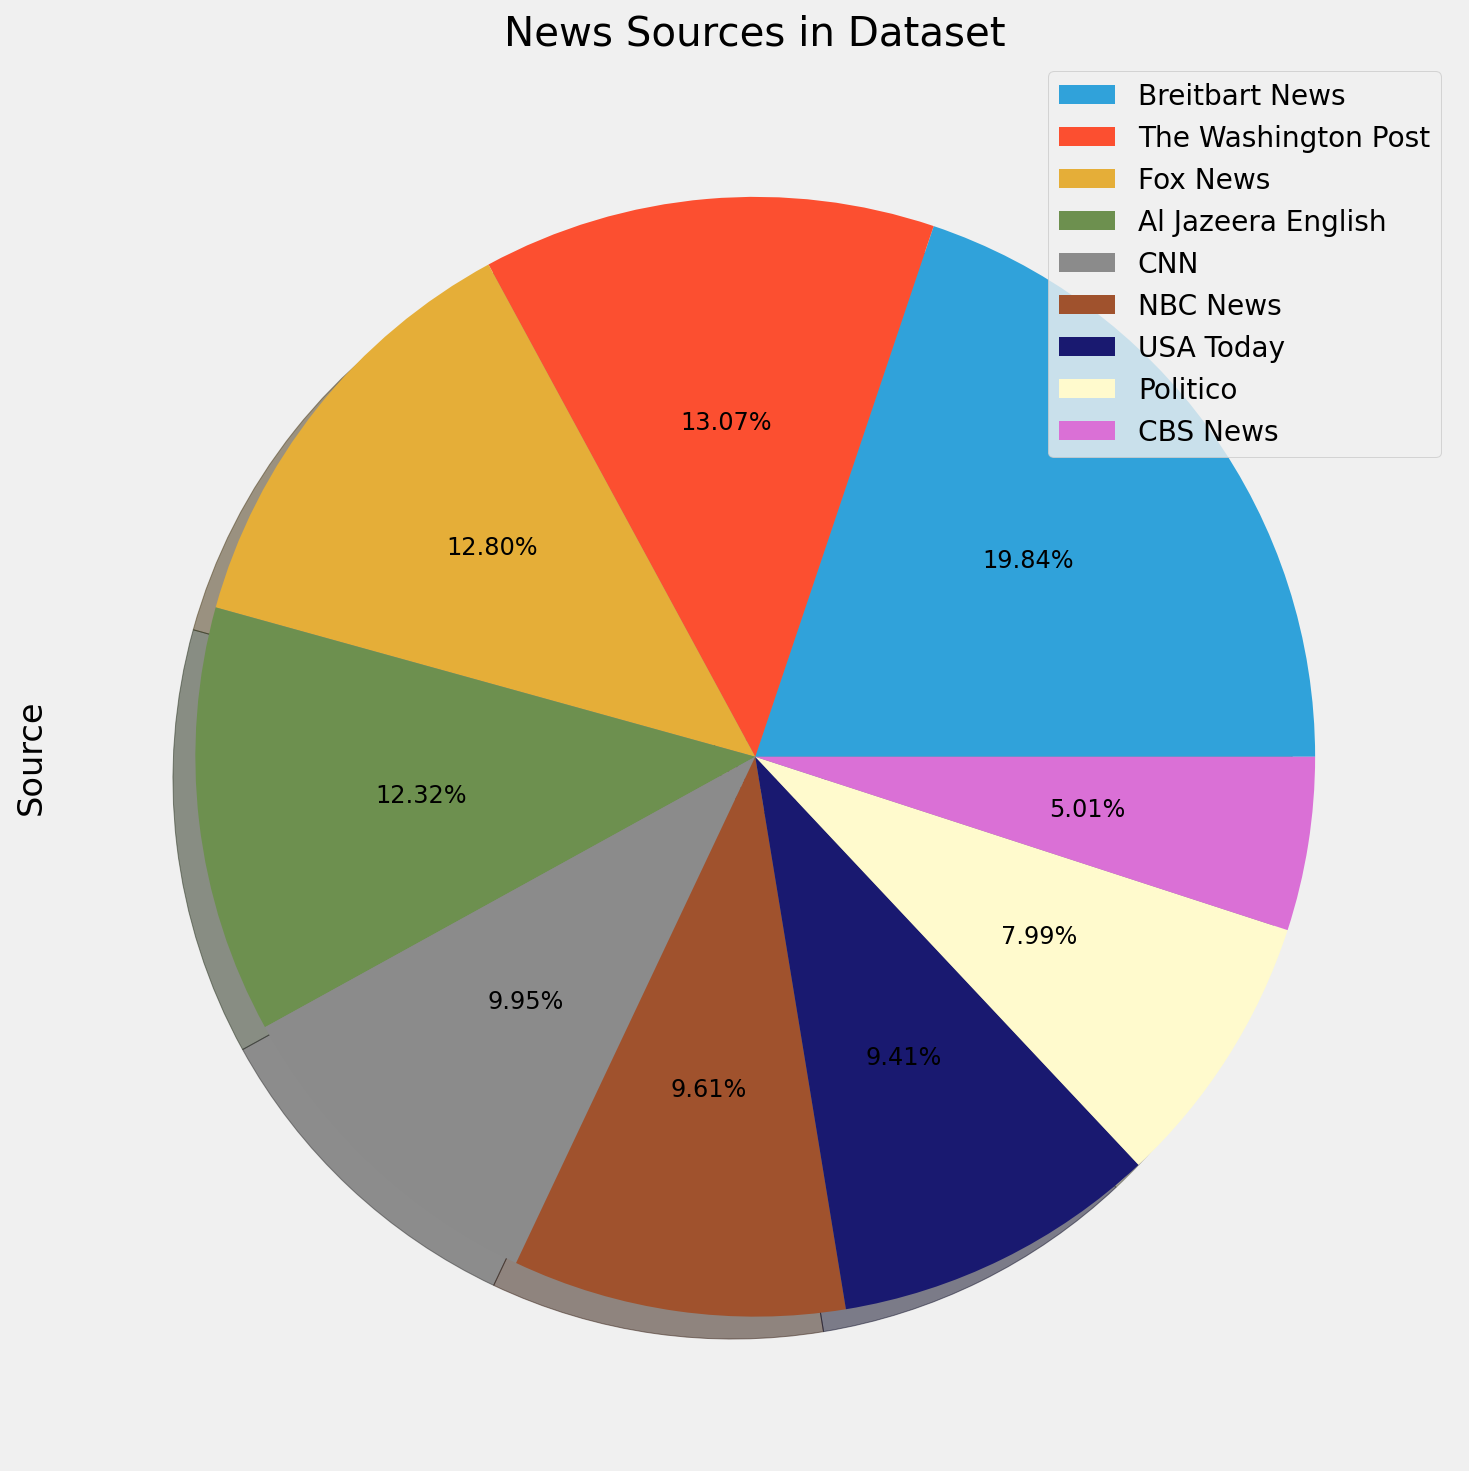

In [13]:
# Pie chart of news sources in dataset
colors = ['#30A2DA', '#FC4F30', '#E5AE38', '#6D904F', '#8B8B8B', 'sienna', 'midnightblue', 'lemonchiffon', 'orchid']
pie = df['Source'].value_counts().plot.pie(autopct='%.2f%%', fontsize=12, figsize=(12, 12), labeldistance=None, legend=True, shadow=True, title='News Sources in Dataset', colors=colors)
pie
plt.show()

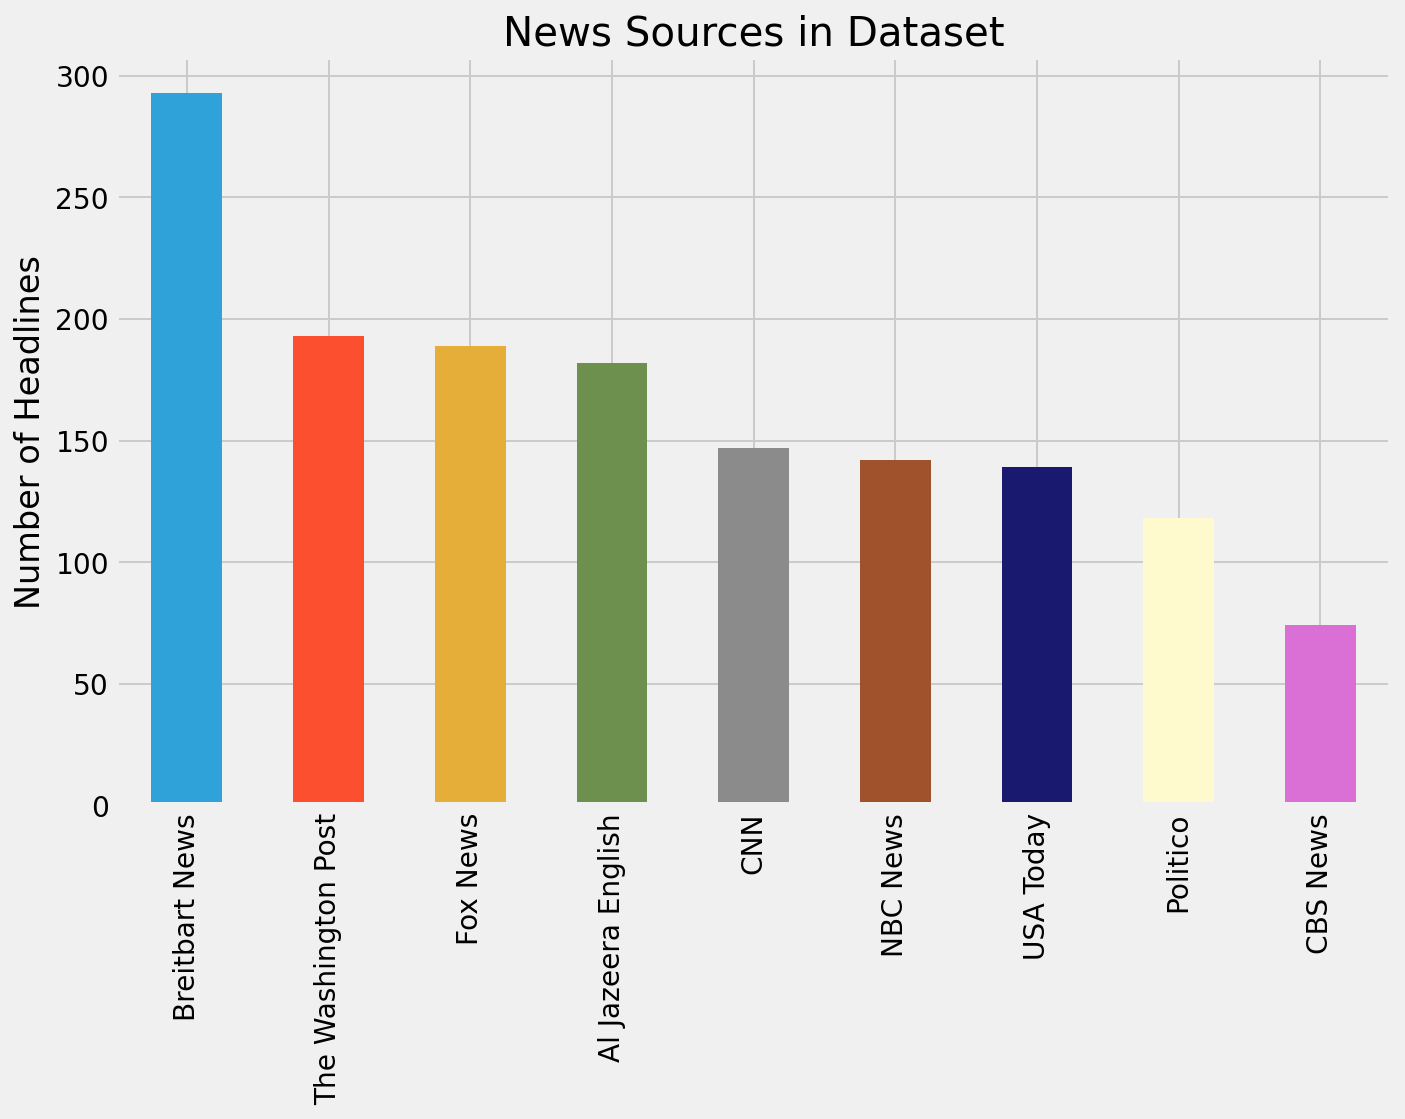

In [14]:
# Bar graph of news sources in data set
df['Source'].value_counts().plot.bar(color = colors, figsize=(10,8))
plt.title('News Sources in Dataset')
plt.ylabel('Number of Headlines')
plt.tight_layout()
plt.savefig('../images/newssourcesindataset.png')
plt.show()

In [17]:
# Calculate average scores by source
scores = df.groupby('Source').mean().reset_index().sort_values(by='Source Bias')
scores

Source  Source Bias  Overall Sentiment  compound score  \
0   Al Jazeera English         -4.4          -0.368132       -0.201256   
7  The Washington Post         -3.7          -0.051813       -0.042474   
6             Politico         -3.5          -0.093220       -0.045558   
3                  CNN         -2.2          -0.054422       -0.036549   
5             NBC News         -2.1          -0.176056       -0.094059   
2             CBS News         -1.6          -0.081081       -0.029945   
8            USA Today         -1.3          -0.086331       -0.047829   
4             Fox News          2.0          -0.137566       -0.080363   
1       Breitbart News          2.9          -0.259386       -0.175600   

   negative score  positive score  neutral score  
0        0.177148        0.051253       0.771615  
7        0.116705        0.088181       0.795119  
6        0.091593        0.080492       0.827924  
3        0.116354        0.093782       0.789871  
5        0.123754        0.071873       0.804394  
2        0.098068        0.074622       0.827324  
8        0.110719        0.092518       0.796777  
4        0.125974        0.081153       0.792857  
1        0.163249        0.065174       0.771573

In [18]:
# Calculate mean compound score 
mean_compound = df['compound score'].mean()
print(f'The average compound sentiment score is {mean_compound:.2f}.')

The average compound sentiment score is -0.10.


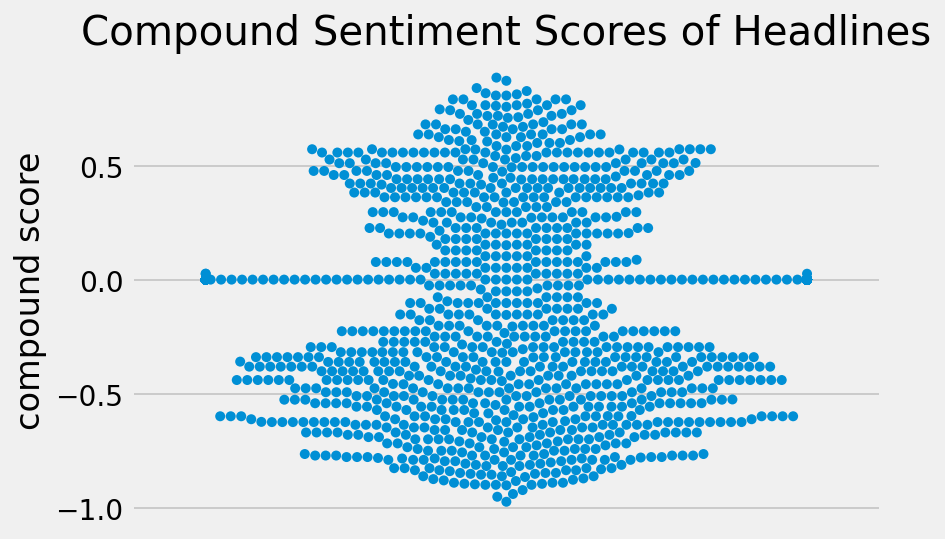

In [16]:
# Create swarmplot of compound scores
sns.swarmplot(y=df['compound score'])
plt.title('Compound Sentiment Scores of Headlines')
plt.show()

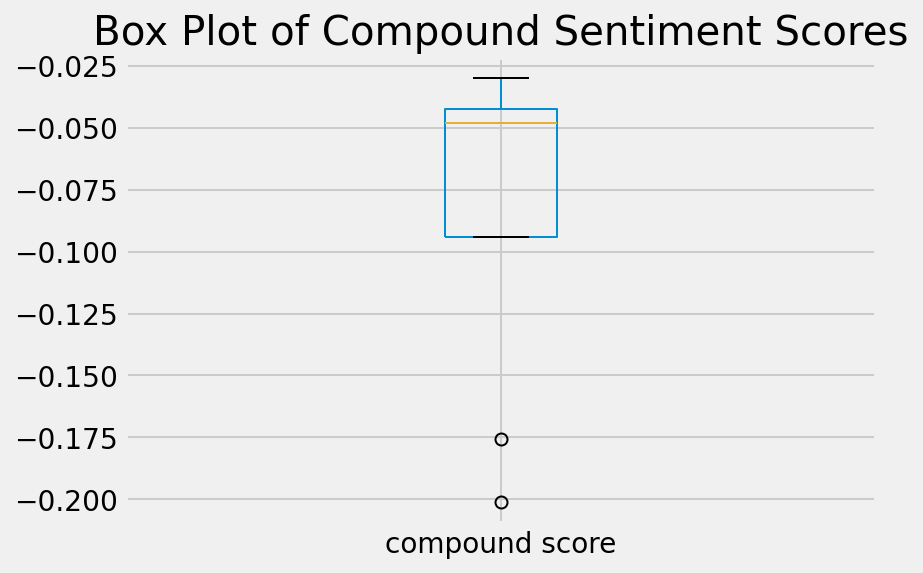

In [17]:
# Box plot of average compound score
scores = df.groupby('Source').mean()
scores['compound score'].plot.box(title='Box Plot of Compound Sentiment Scores')

plt.show()

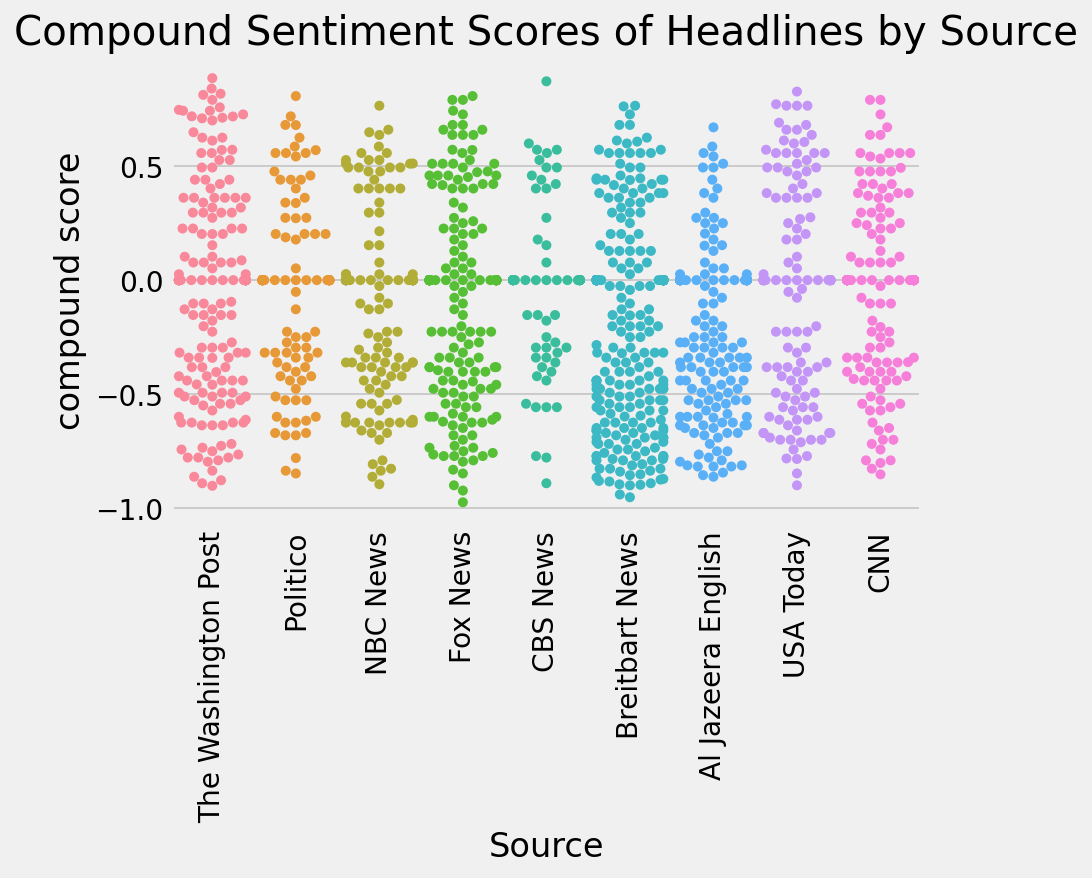

In [19]:
# Create swarmplot of compound scores by news source
ax = sns.swarmplot(x= df['Source'], y=df['compound score'])
plt.title('Compound Sentiment Scores of Headlines by Source')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

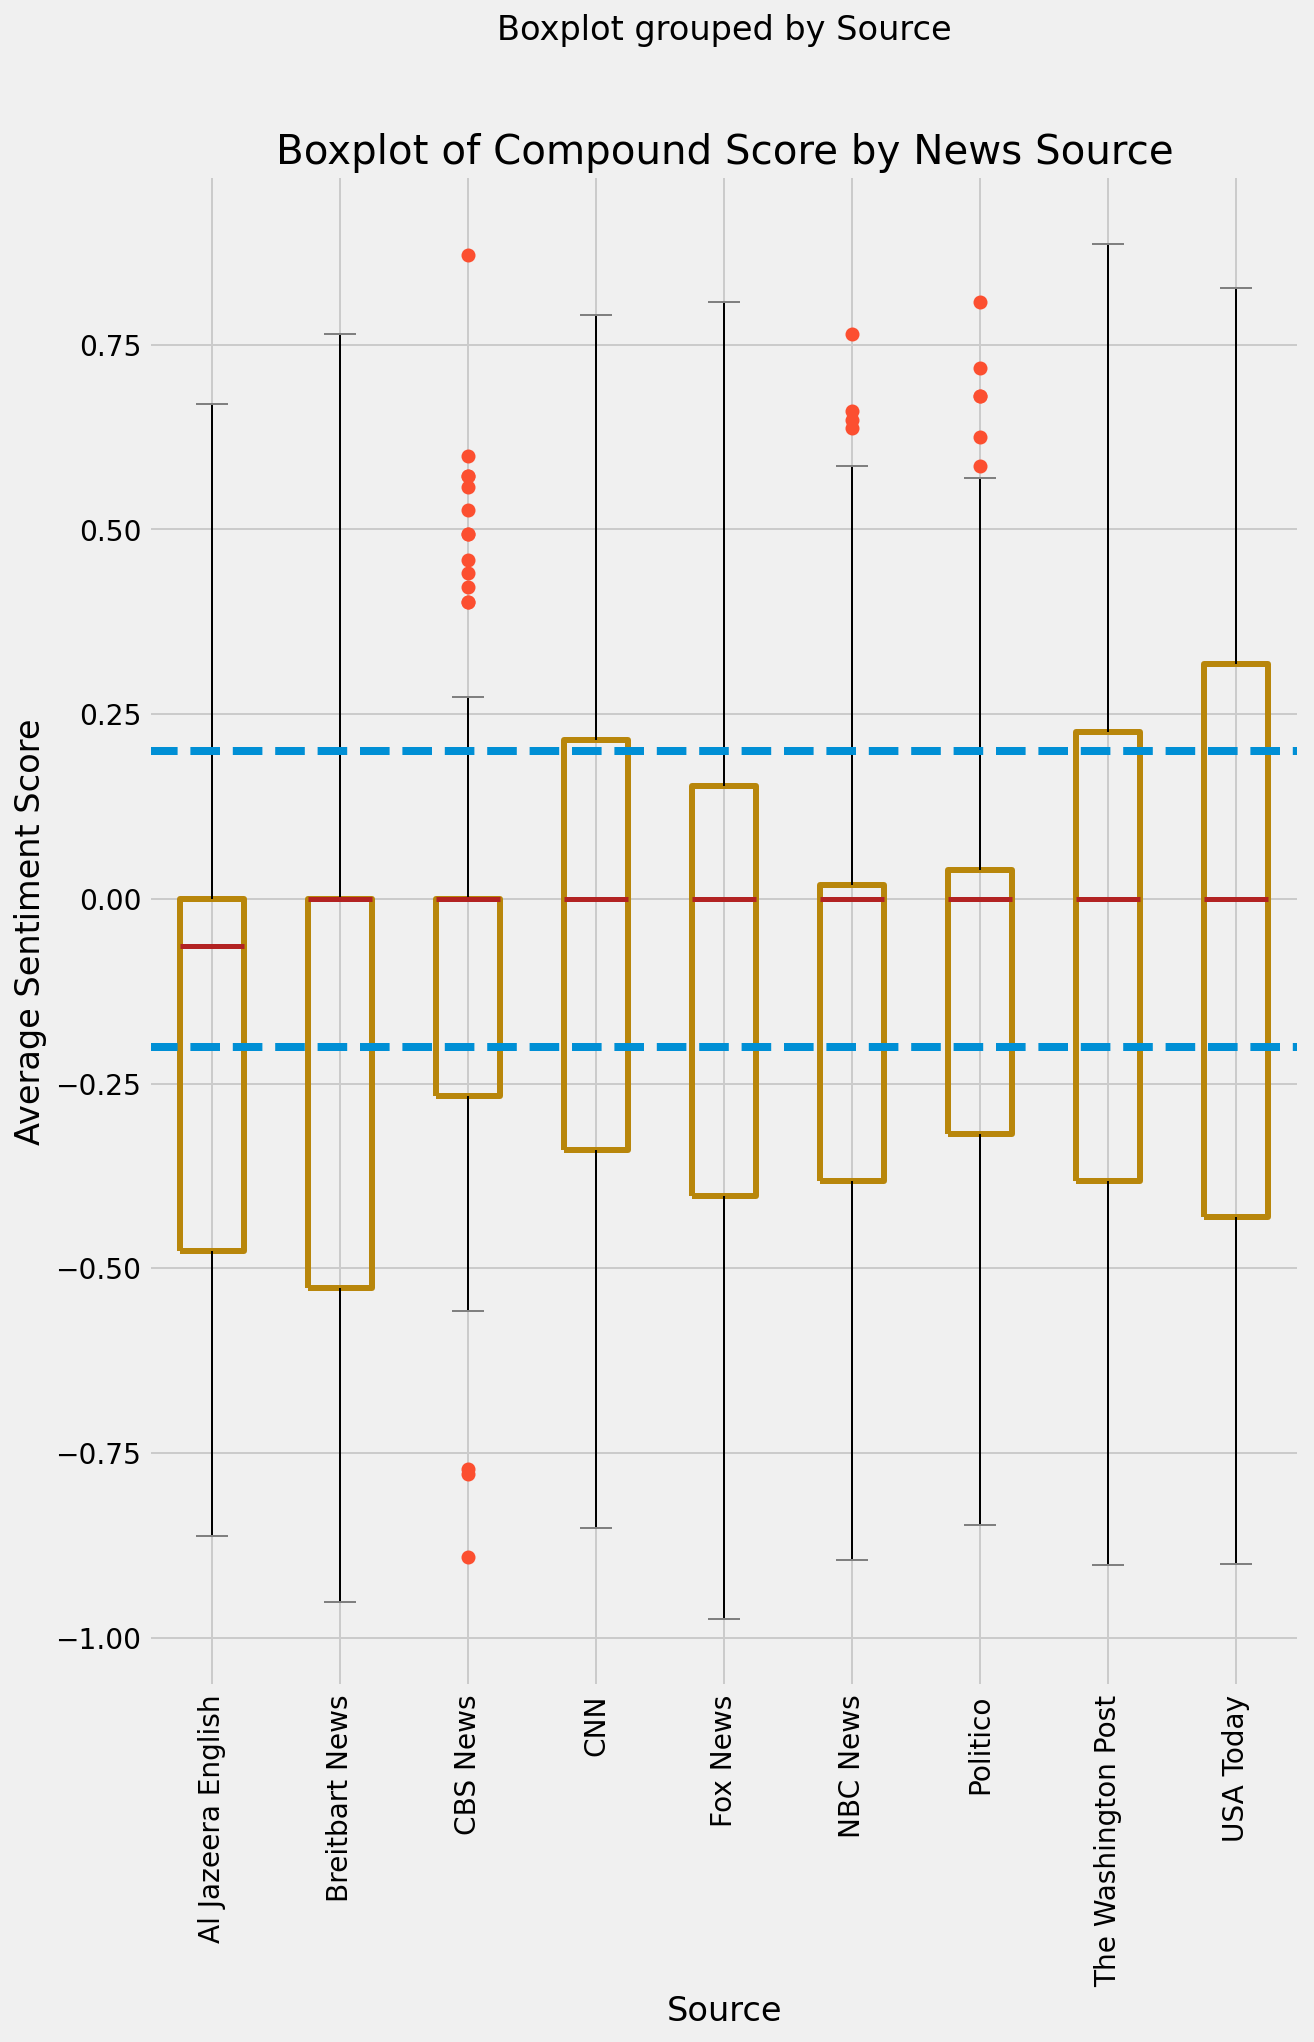

In [20]:
# Boxplot of compound scores by news sources
color = {'boxes': 'Green', 'whiskers': 'black', 'medians': 'Blue', 'caps': 'Gray'}
boxprops = dict(linestyle='-', linewidth=3, color='darkgoldenrod')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
df.boxplot(column='compound score', by='Source', figsize=(10, 14), color=color, sym='#FC4F30', boxprops=boxprops, medianprops=medianprops) 
plt.xticks(rotation='vertical')
plt.title('Boxplot of Compound Score by News Source')
plt.ylabel('Average Sentiment Score')
plt.axhline(0.20, linestyle='--')
plt.axhline(-0.20, linestyle='--')
plt.savefig('../images/boxplotaveragecompoundscores.png')
plt.show()

## Sentiment Scores

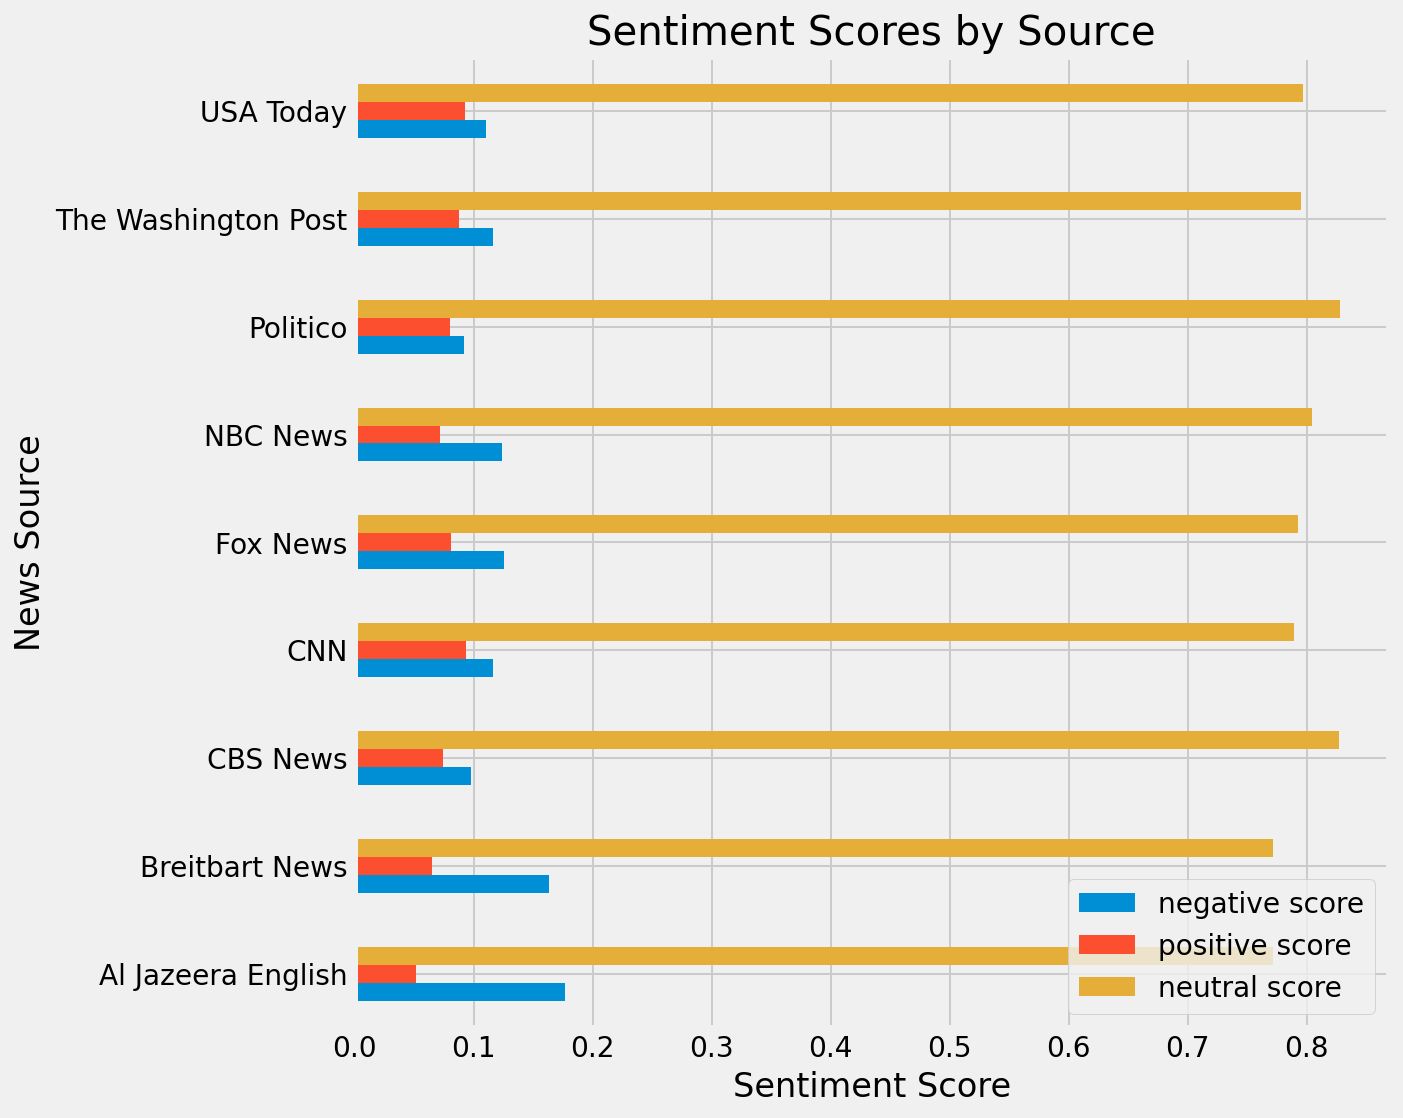

In [21]:
# Bar graph of percentage of each sentiment score by source
df[['Source', 'negative score', 'positive score', 'neutral score']].groupby('Source').mean().plot.barh(figsize=(10, 8), title = 'Sentiment Scores by Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.tight_layout()


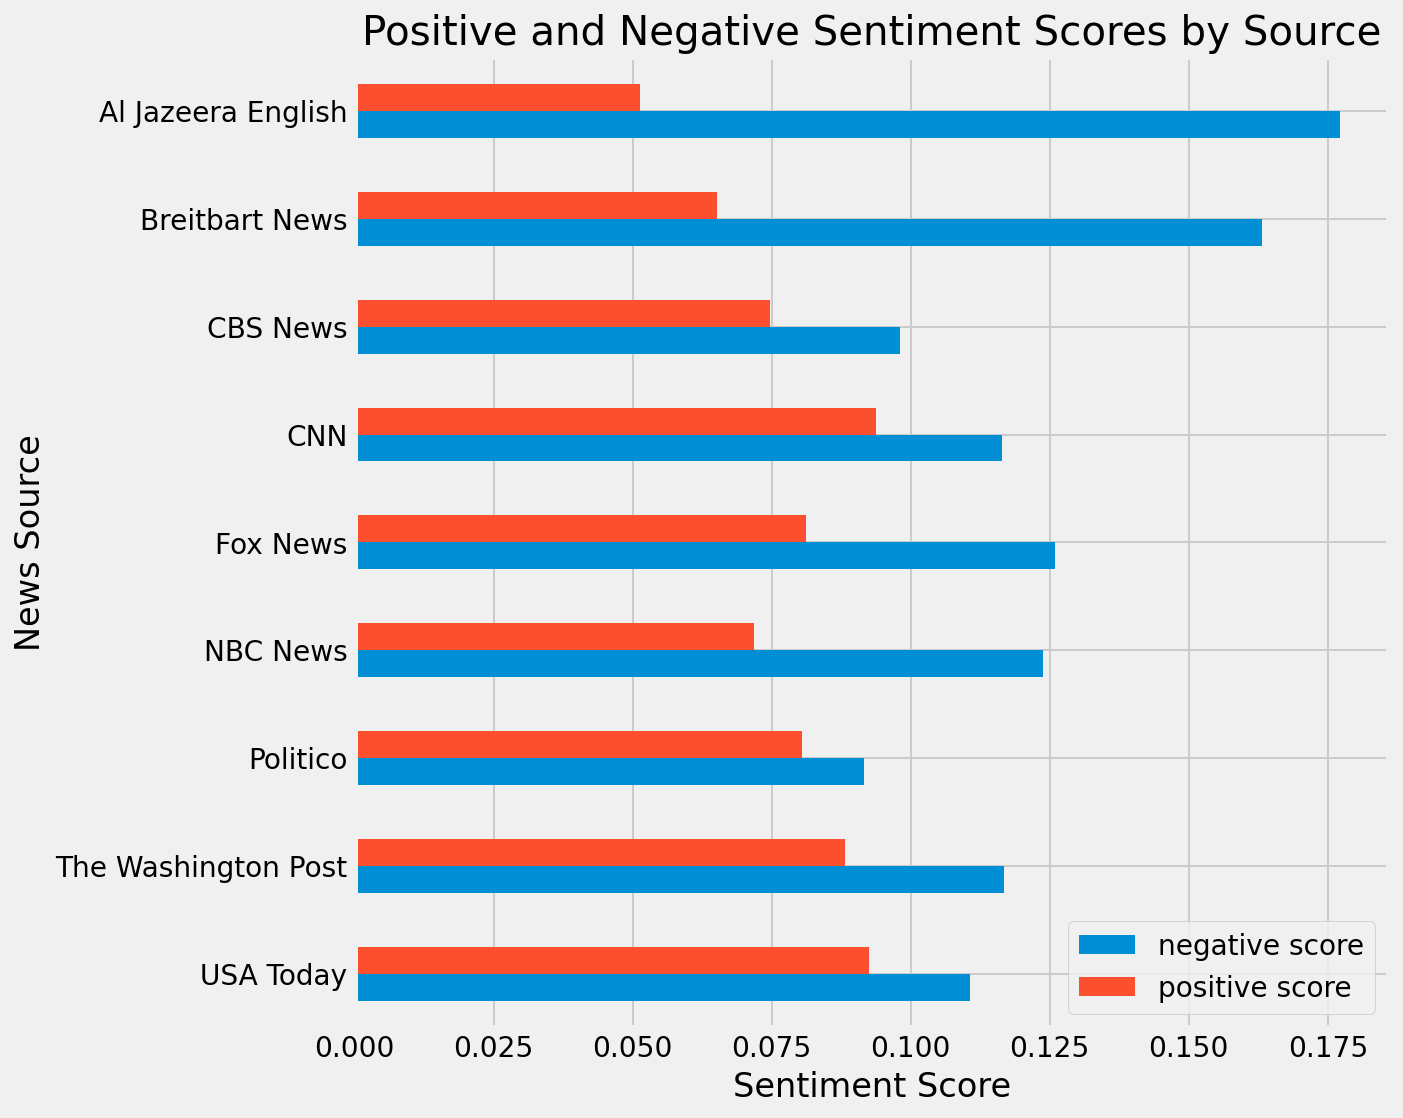

In [22]:
# Bar graph of positive and negative sentiment scores by source
df[['Source', 'negative score', 'positive score']].groupby('Source').mean().sort_values(by='Source', ascending=False).plot.barh(figsize=(10, 8), title = 'Positive and Negative Sentiment Scores by Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.tight_layout()
scores = df.groupby('Source').mean()

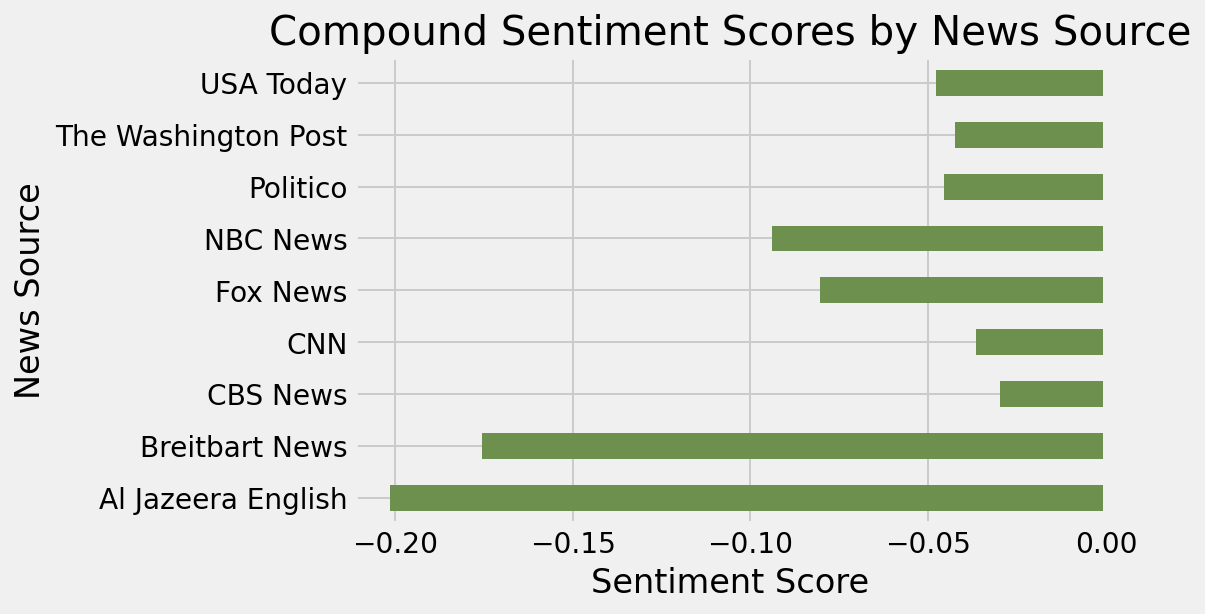

In [23]:
# Bar graph of compound sentiment scores by source
scores['compound score'].plot.barh(title='Compound Sentiment Scores by News Source', color='#6D904F')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

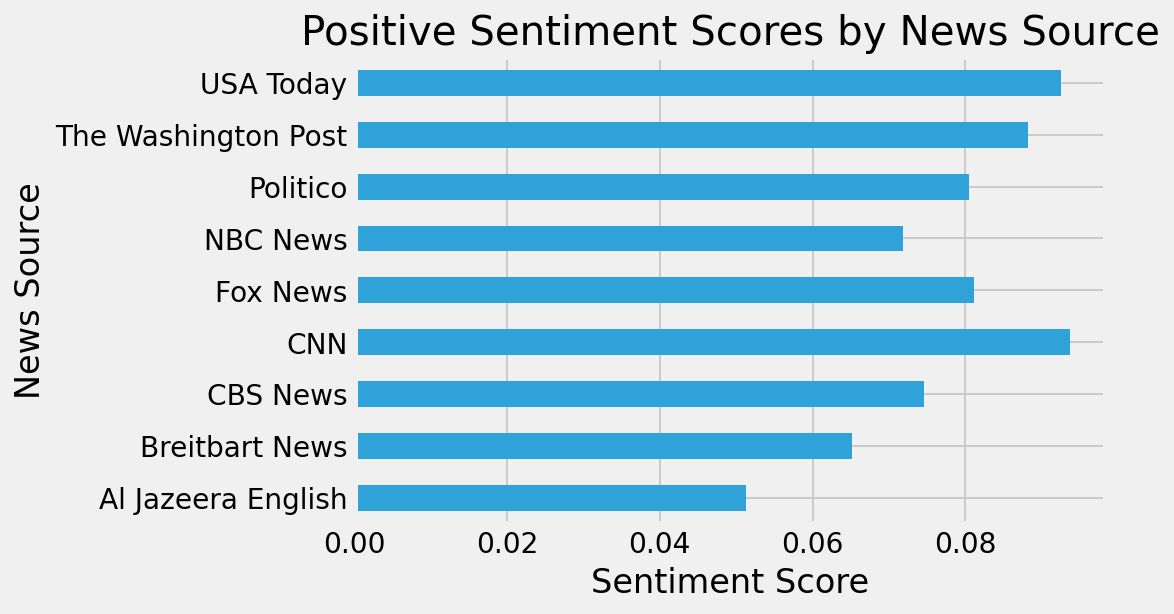

In [24]:
# Bar graph of positive sentiment scores by source 
scores['positive score'].plot.barh(color='#30A2DA', title='Positive Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

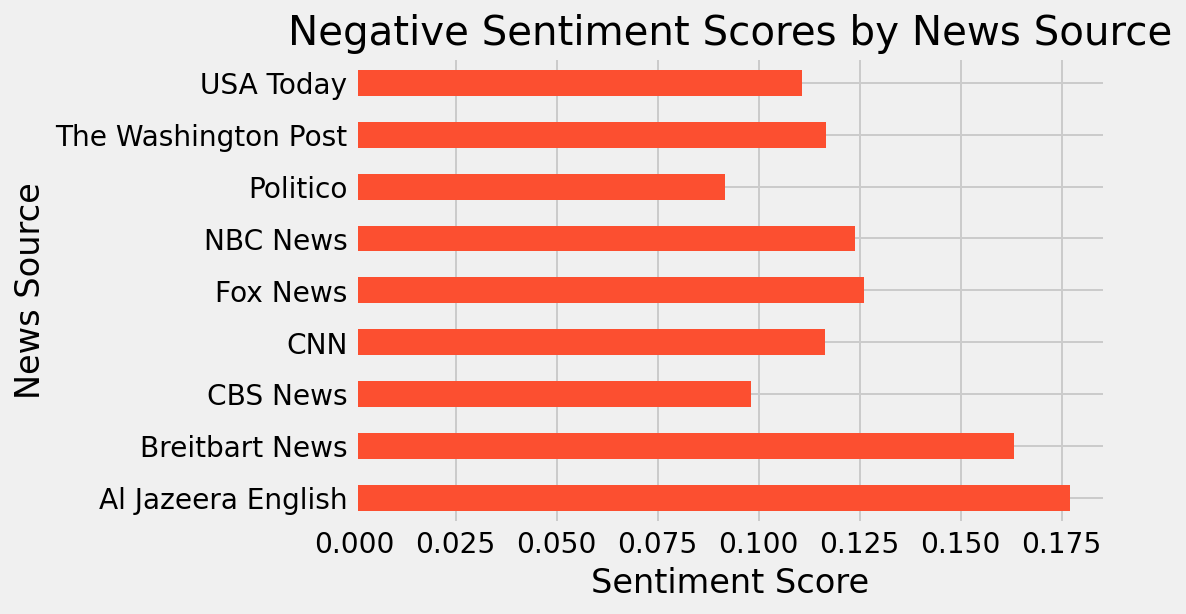

In [25]:
# Bar graph of negative sentiment score by source
scores['negative score'].plot.barh(color='#FC4F30', title='Negative Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

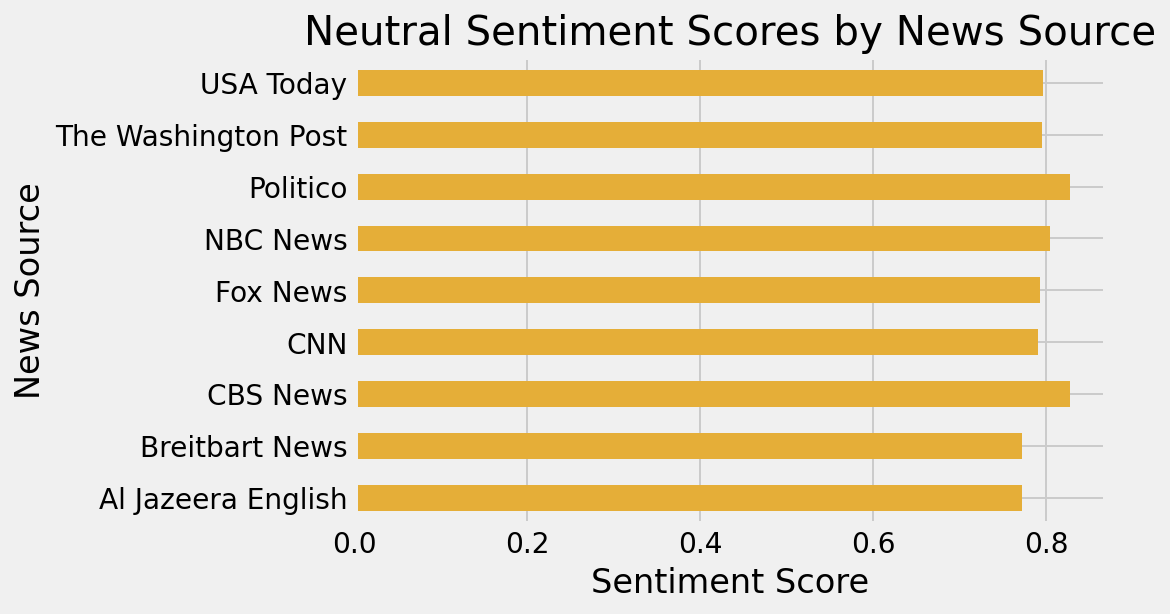

In [26]:
# Bar graph of neutral sentiment score by source
scores['neutral score'].plot.barh(color='#E5AE38', title='Neutral Sentiment Scores by News Source')
plt.xlabel('Sentiment Score')
plt.ylabel('News Source')
plt.show()

## Overall Sentiment

In [27]:
# Create copy of dataframe that labels overall sentiment with strings instead of integers
df_sentiments = df.copy()
for index, row in df_sentiments.iterrows():
    sentiment = row['Overall Sentiment']
    if sentiment == -1:
        df_sentiments.loc[index, 'Overall Sentiment'] = 'Negative'
    if sentiment == 0:
        df_sentiments.loc[index, 'Overall Sentiment'] = 'Neutral'
    if sentiment == 1:
        df_sentiments.loc[index, 'Overall Sentiment'] = 'Positive'
        
df_sentiments.head()

Source  Source Bias                                 Author  \
0  The Washington Post         -3.7                            Nick Miroff   
1  The Washington Post         -3.7            Nick Miroff, Devlin Barrett   
2  The Washington Post         -3.7                            Tim Elfrink   
3  The Washington Post         -3.7  James A. McCann, Michael Jones-Correa   
4  The Washington Post         -3.7                           Steven Moore   

                                               Title Overall Sentiment  \
0  Hospital where activists say ICE detainees wer...           Neutral   
1  ICE preparing targeted arrests in ‘sanctuary c...          Negative   
2  ‘They’re still not taking this seriously’: Whi...           Neutral   
3  Trump’s attacks prompted Latino immigrants to ...          Negative   
4  ICE is accused of sterilizing detainees. That ...          Negative   

   compound score  negative score  positive score  neutral score  
0          0.0000           0.000           0.000          1.000  
1         -0.4404           0.182           0.000          0.818  
2         -0.1531           0.198           0.126          0.676  
3         -0.4404           0.195           0.000          0.805  
4         -0.6369           0.286           0.000          0.714

In [28]:
# Count of sentiment labels by news source
sentiments_grouped = df_sentiments[['Source', 'Overall Sentiment', 'Title']].groupby(['Source', 'Overall Sentiment']).count()
sentiments = sentiments_grouped.reset_index()
sentiments

Source Overall Sentiment  Title
0    Al Jazeera English          Negative     85
1    Al Jazeera English           Neutral     79
2    Al Jazeera English          Positive     18
3        Breitbart News          Negative    125
4        Breitbart News           Neutral    119
5        Breitbart News          Positive     49
6              CBS News          Negative     20
7              CBS News           Neutral     40
8              CBS News          Positive     14
9                   CNN          Negative     46
10                  CNN           Neutral     63
11                  CNN          Positive     38
12             Fox News          Negative     72
13             Fox News           Neutral     71
14             Fox News          Positive     46
15             NBC News          Negative     54
16             NBC News           Neutral     59
17             NBC News          Positive     29
18             Politico          Negative     38
19             Politico           Neutral     53
20             Politico          Positive     27
21  The Washington Post          Negative     63
22  The Washington Post           Neutral     77
23  The Washington Post          Positive     53
24            USA Today          Negative     52
25            USA Today           Neutral     47
26            USA Today          Positive     40

In [29]:
# Create new dataframe of count of headlines with each overall sentiment by source 
sentiment_new = pd.pivot_table(sentiments, index='Source', columns='Overall Sentiment', values ='Title')
sentiment_new

Overall Sentiment    Negative  Neutral  Positive
Source                                          
Al Jazeera English         85       79        18
Breitbart News            125      119        49
CBS News                   20       40        14
CNN                        46       63        38
Fox News                   72       71        46
NBC News                   54       59        29
Politico                   38       53        27
The Washington Post        63       77        53
USA Today                  52       47        40

In [30]:
# Determine percentage of each sentiment category
sentiment_new['Total Comments'] = sentiment_new['Negative'] + sentiment_new['Neutral'] + sentiment_new['Positive']
sentiment_new['% Negative'] = sentiment_new['Negative']/sentiment_new['Total Comments']*100
sentiment_new['% Neutral'] = sentiment_new['Neutral']/sentiment_new['Total Comments']*100
sentiment_new['% Positive'] = sentiment_new['Positive']/sentiment_new['Total Comments']*100

sentiment_filtered = sentiment_new[['% Negative', '% Neutral', '% Positive']]
sentiment_filtered

Overall Sentiment    % Negative  % Neutral  % Positive
Source                                                
Al Jazeera English    46.703297  43.406593    9.890110
Breitbart News        42.662116  40.614334   16.723549
CBS News              27.027027  54.054054   18.918919
CNN                   31.292517  42.857143   25.850340
Fox News              38.095238  37.566138   24.338624
NBC News              38.028169  41.549296   20.422535
Politico              32.203390  44.915254   22.881356
The Washington Post   32.642487  39.896373   27.461140
USA Today             37.410072  33.812950   28.776978

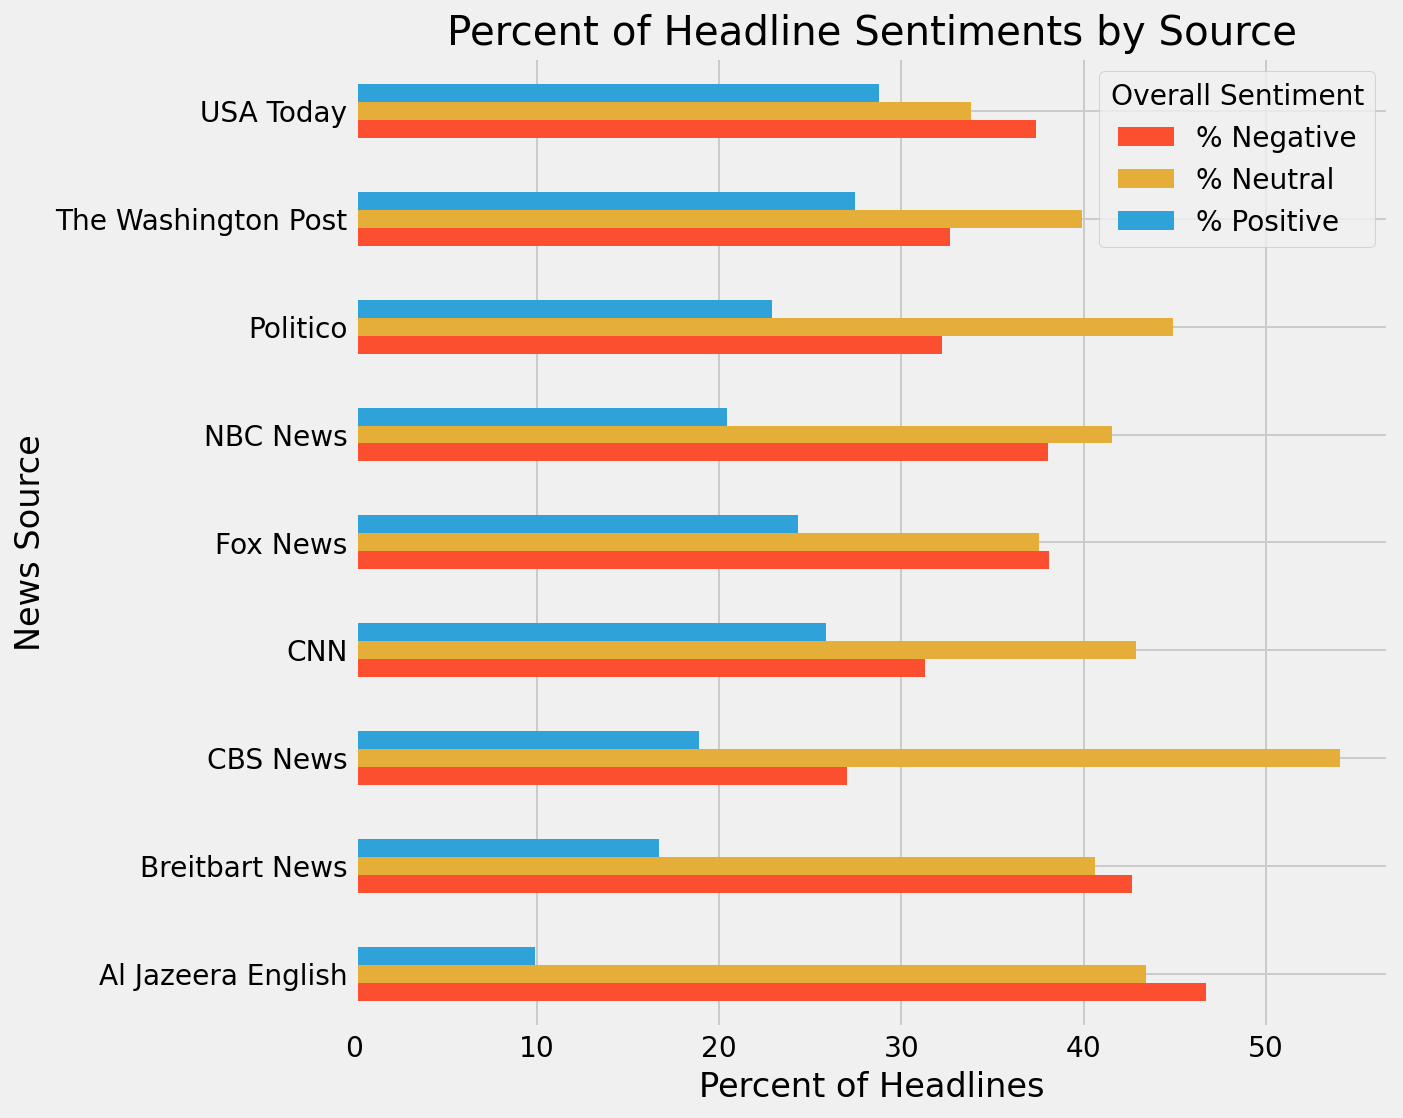

In [31]:
# Bar graph of number of sentiment score types by source
colors = ['#fc4f30', '#e5ae38', '#30a2da']
sentiment_filtered.plot.barh(figsize=(10, 8), title = 'Percent of Headline Sentiments by Source', color=colors)
plt.xlabel('Percent of Headlines')
plt.ylabel('News Source')
plt.tight_layout()
plt.savefig('../images/headlinesentimentspercent.png')

## Word Frequency

In [32]:
# This function tokenizes text (removes punctuation and stop words)
# Input = list of strings
# Output = list of tokens

def process_corpus(titles):
    tokens = []
    for title in titles:
        
        # Remove punctuation while tokenizing
        tokenizer = RegexpTokenizer(r'\w+')
        toks = tokenizer.tokenize(title)
        
        # Convert tokens to lowercase and then remove stop words
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

In [33]:
# Determine most frequent words in all headlines
# Create list of headlines 
headlines = list(df['Title'])

# Create token list of headlines
headlines_tokens = process_corpus(headlines)

# Determine frequency of words in token list
headlines_freq = nltk.FreqDist(headlines_tokens)
top_terms_all = headlines_freq.most_common(20)
top_terms_all

[('trump', 349),
 ('biden', 138),
 ('court', 85),
 ('new', 81),
 ('covid', 74),
 ('coronavirus', 67),
 ('migrants', 66),
 ('migrant', 61),
 ('us', 60),
 ('says', 57),
 ('debate', 55),
 ('u', 49),
 ('harris', 49),
 ('19', 48),
 ('voters', 48),
 ('supreme', 47),
 ('election', 43),
 ('border', 43),
 ('ice', 39),
 ('american', 37)]

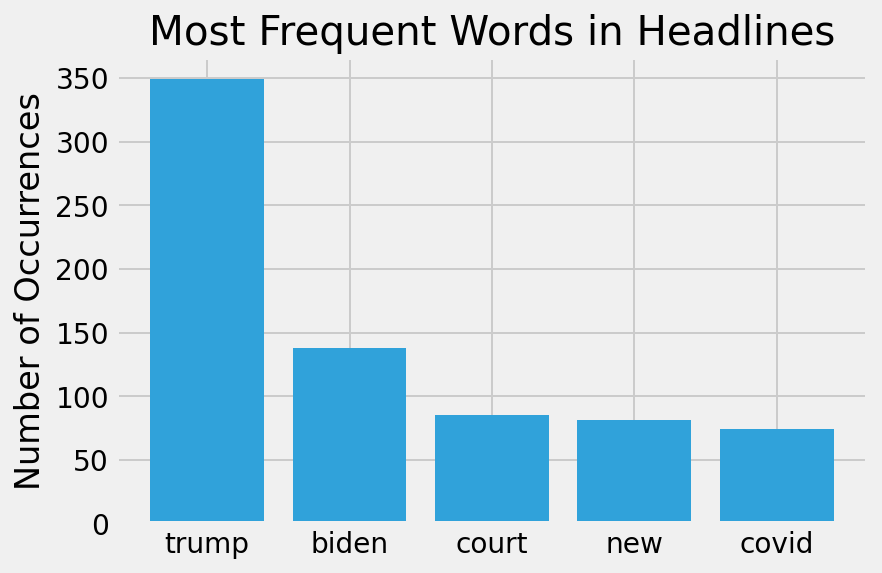

In [34]:
# Graph top 5 terms in all headlines
# Pull out top 5 terms
terms = []
counts = []
for value in range (0,5):
    term = top_terms_all[value][0]
    count = top_terms_all[value][1]
    terms.append(term)
    counts.append(count)

# Graph terms
plt.bar(terms, counts, color='#30A2DA')
plt.ylabel('Number of Occurrences')
plt.title('Most Frequent Words in Headlines')
plt.show()

In [35]:
# Determine most frequent words in positive headlines
# Create list of headlines that are positive
pos_headlines = list(df.loc[df['Overall Sentiment']==1]['Title'])

# Create token list of positive headlines
pos_headlines_tokens = process_corpus(pos_headlines)

# Determine frequency of words in token list
pos_headlines_freq = nltk.FreqDist(pos_headlines_tokens)
top_terms_pos = pos_headlines_freq.most_common(20)
top_terms_pos

[('trump', 88),
 ('court', 44),
 ('supreme', 41),
 ('biden', 29),
 ('justice', 21),
 ('amy', 18),
 ('coney', 18),
 ('barrett', 18),
 ('new', 16),
 ('voters', 15),
 ('says', 15),
 ('coronavirus', 15),
 ('harris', 14),
 ('like', 14),
 ('covid', 14),
 ('help', 13),
 ('ginsburg', 13),
 ('democrats', 13),
 ('care', 12),
 ('could', 12)]

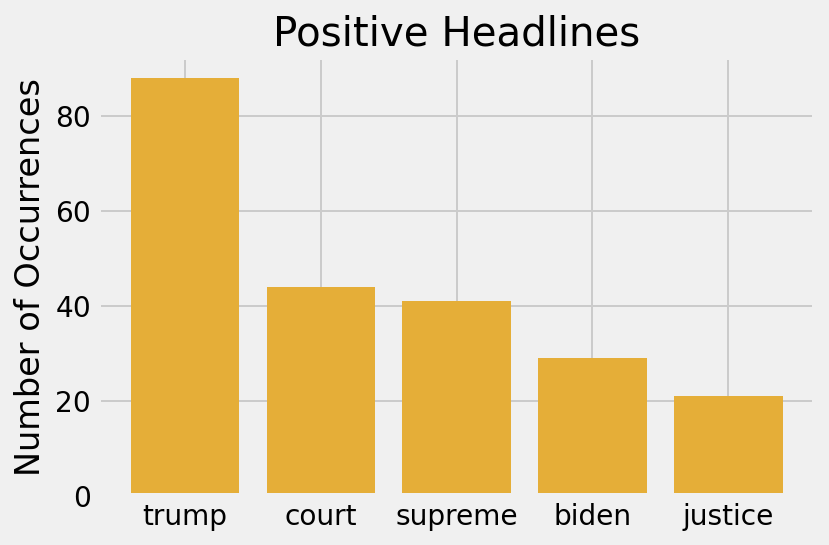

In [36]:
# Graph top 5 terms in positive headlines
# Pull out top 5 terms 
terms_pos = []
counts_pos = []
for value in range (0,5):
    term = top_terms_pos[value][0]
    count = top_terms_pos[value][1]
    terms_pos.append(term)
    counts_pos.append(count)

# Create graph
plt.bar(terms_pos, counts_pos, color='#E5AE38')
plt.ylabel('Number of Occurrences')
plt.title('Positive Headlines')
plt.tight_layout()
plt.savefig('../images/frequenttermspositive.png')
plt.show()

In [37]:
# Determine most frequent words in negative headlines
# Create list of headlines that are negative 
neg_headlines = list(df.loc[df['Overall Sentiment']==-1]['Title'])

# Create token list of negative headlines
neg_headlines_tokens = process_corpus(neg_headlines)

# Determine frequency of words in token list
neg_headlines_freq = nltk.FreqDist(neg_headlines_tokens)
top_terms_neg = neg_headlines_freq.most_common(20)
top_terms_neg

[('trump', 126),
 ('biden', 48),
 ('new', 38),
 ('illegal', 33),
 ('migrants', 32),
 ('migrant', 31),
 ('covid', 27),
 ('us', 26),
 ('ice', 25),
 ('death', 22),
 ('court', 21),
 ('says', 21),
 ('border', 21),
 ('19', 18),
 ('crisis', 18),
 ('election', 17),
 ('pandemic', 17),
 ('voters', 17),
 ('camp', 17),
 ('fight', 16)]

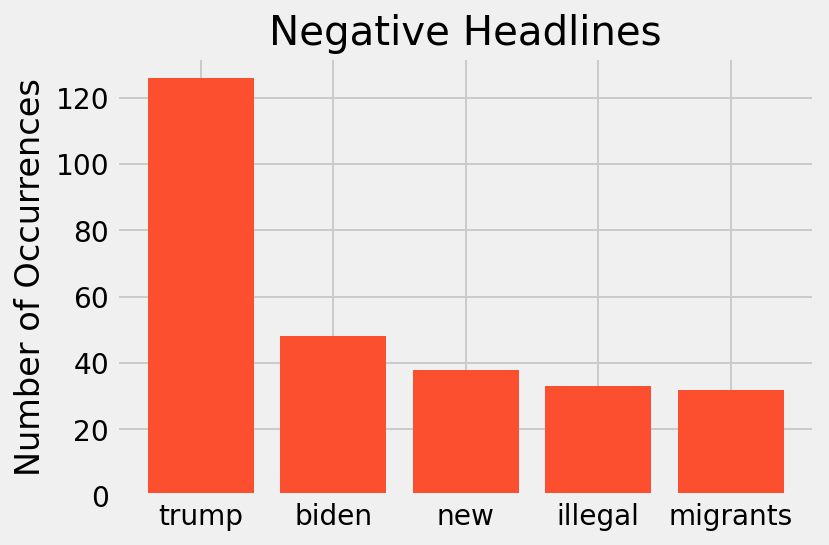

In [38]:
# Graph top 5 terms in negative headlines
# Pull out top 5 terms
terms_neg = []
counts_neg = []
for value in range (0,5):
    term = top_terms_neg[value][0]
    count = top_terms_neg[value][1]
    terms_neg.append(term)
    counts_neg.append(count)

# Create graph
plt.bar(terms_neg, counts_neg, color='#FC4F30')
plt.ylabel('Number of Occurrences')
plt.title('Negative Headlines')
plt.tight_layout()
plt.savefig('../images/frequenttermsnegative.png')
plt.show()

In [39]:
# Function which creates a fancy word cloud
# input = word frequency list, color is preferred background color, _type is to differentiate name of saved image
# output = word cloud saves as PNG and displays in notebook
def wordcloud_draw(data, color, _type):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(f'../images/wordcloud{_type}.png')
    plt.show()

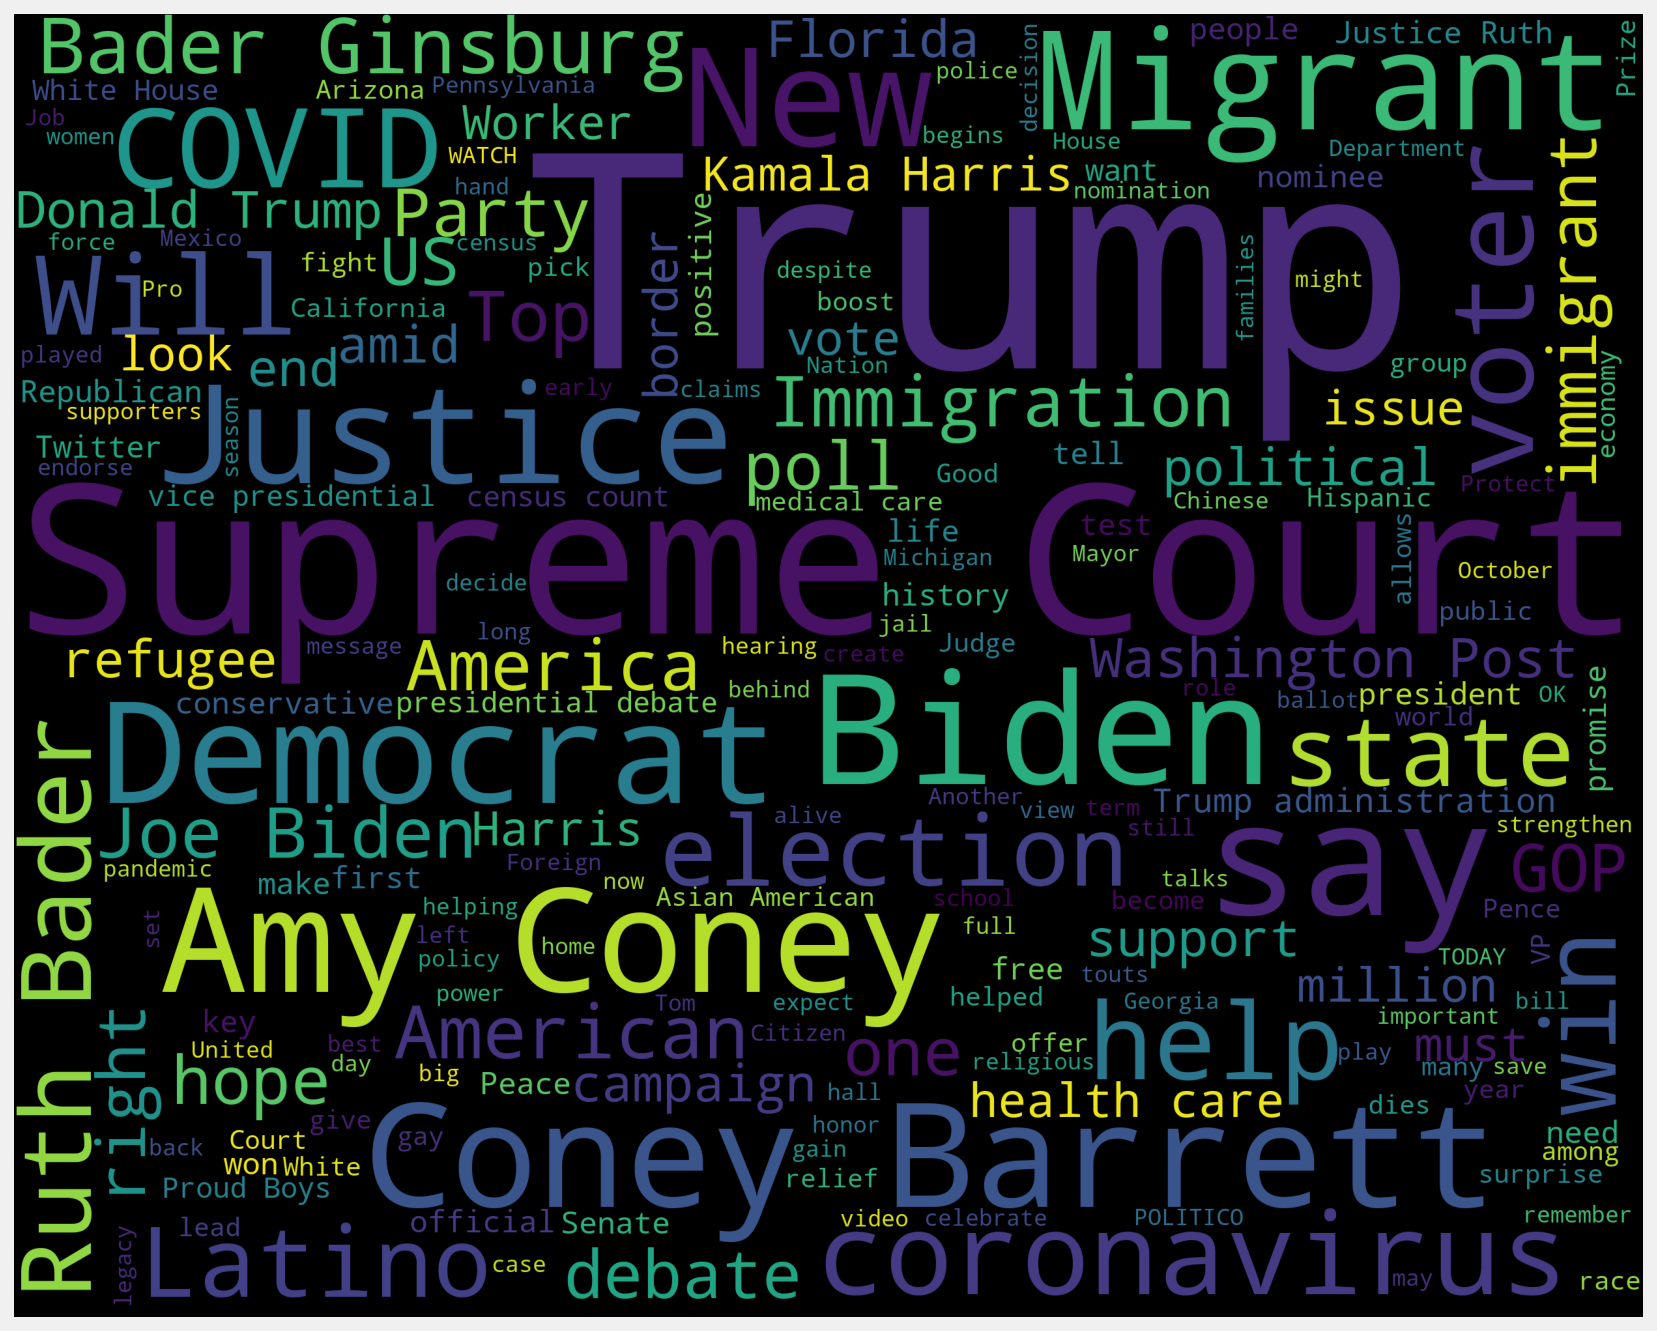

In [40]:
# Pretty word cloud of positive headlines
wordcloud_draw(pos_headlines,'black', 'positive')

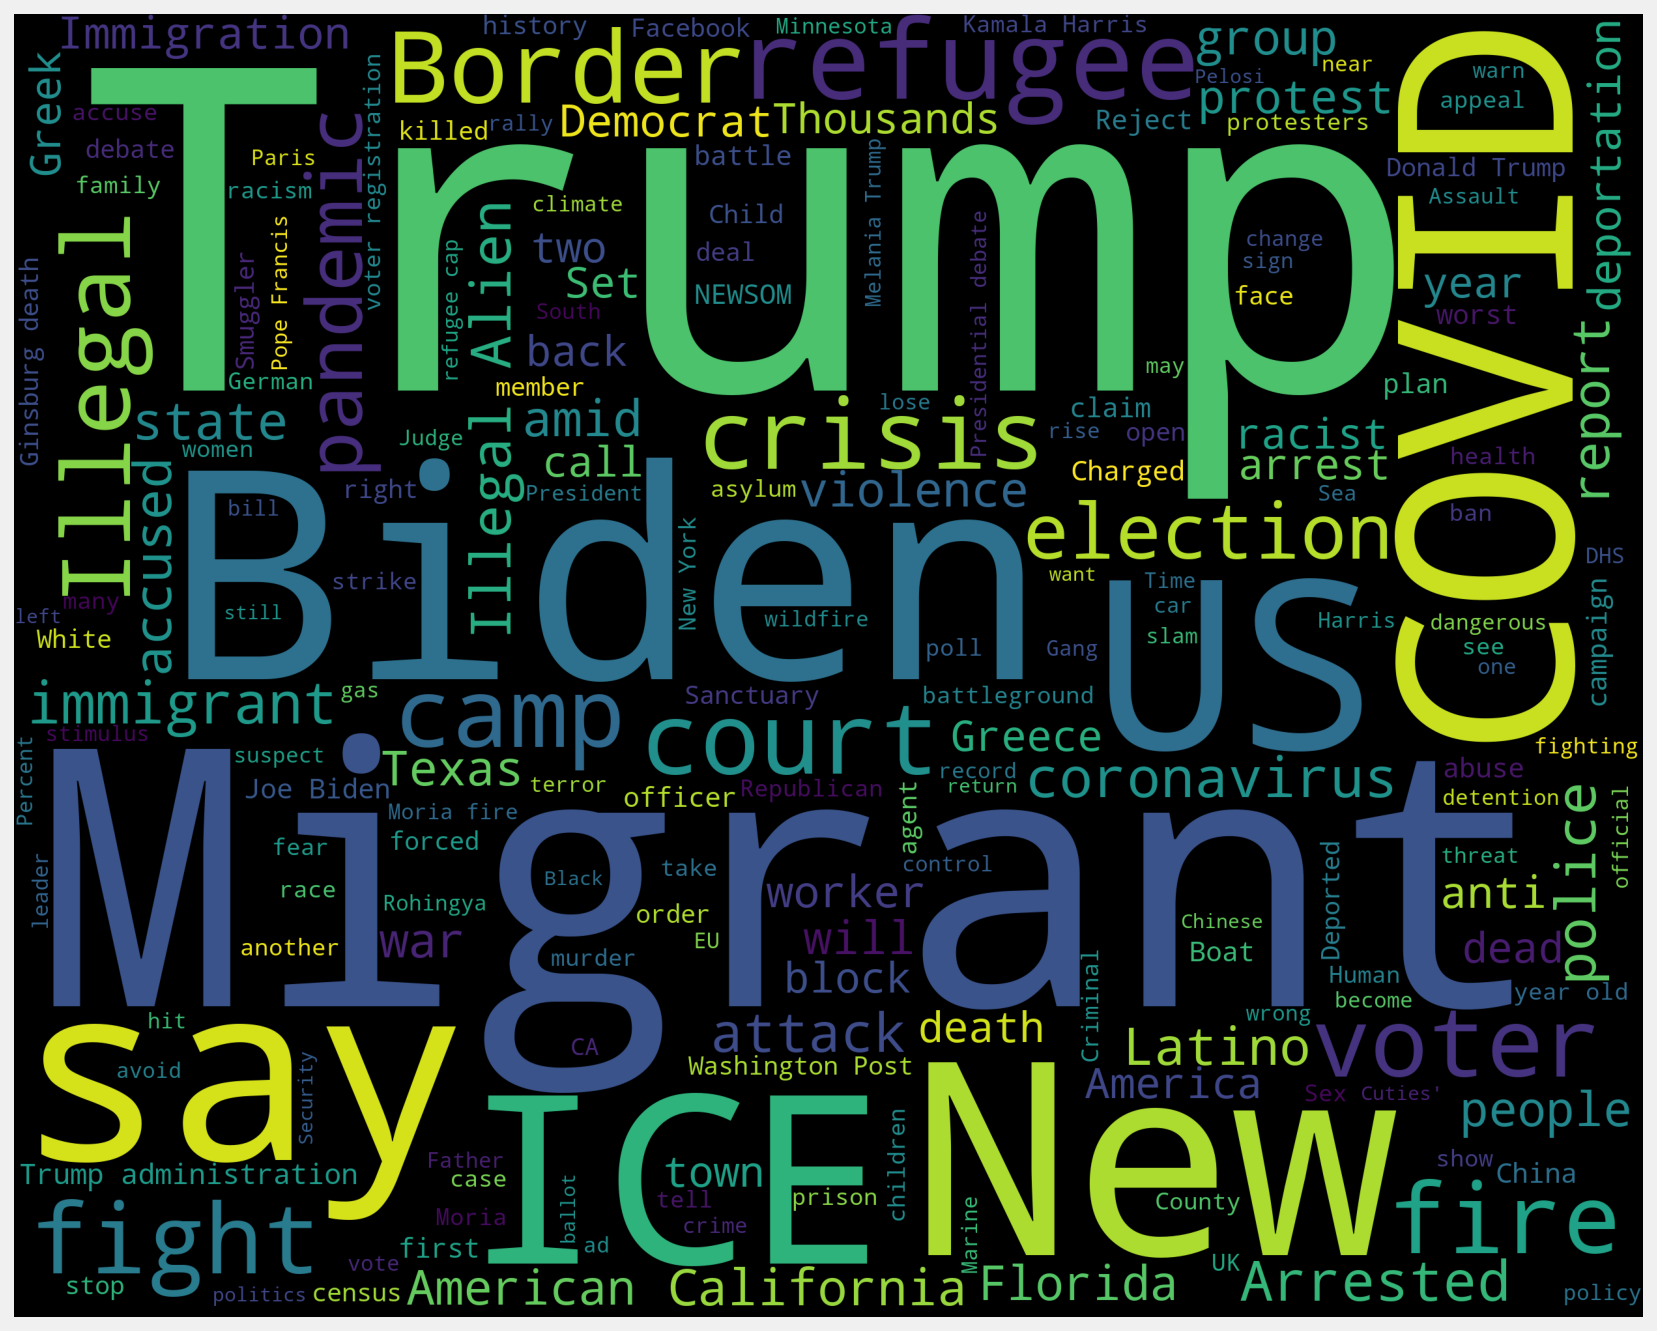

In [41]:
# Pretty word cloud of negative headlines
wordcloud_draw(neg_headlines, 'black', 'negative')

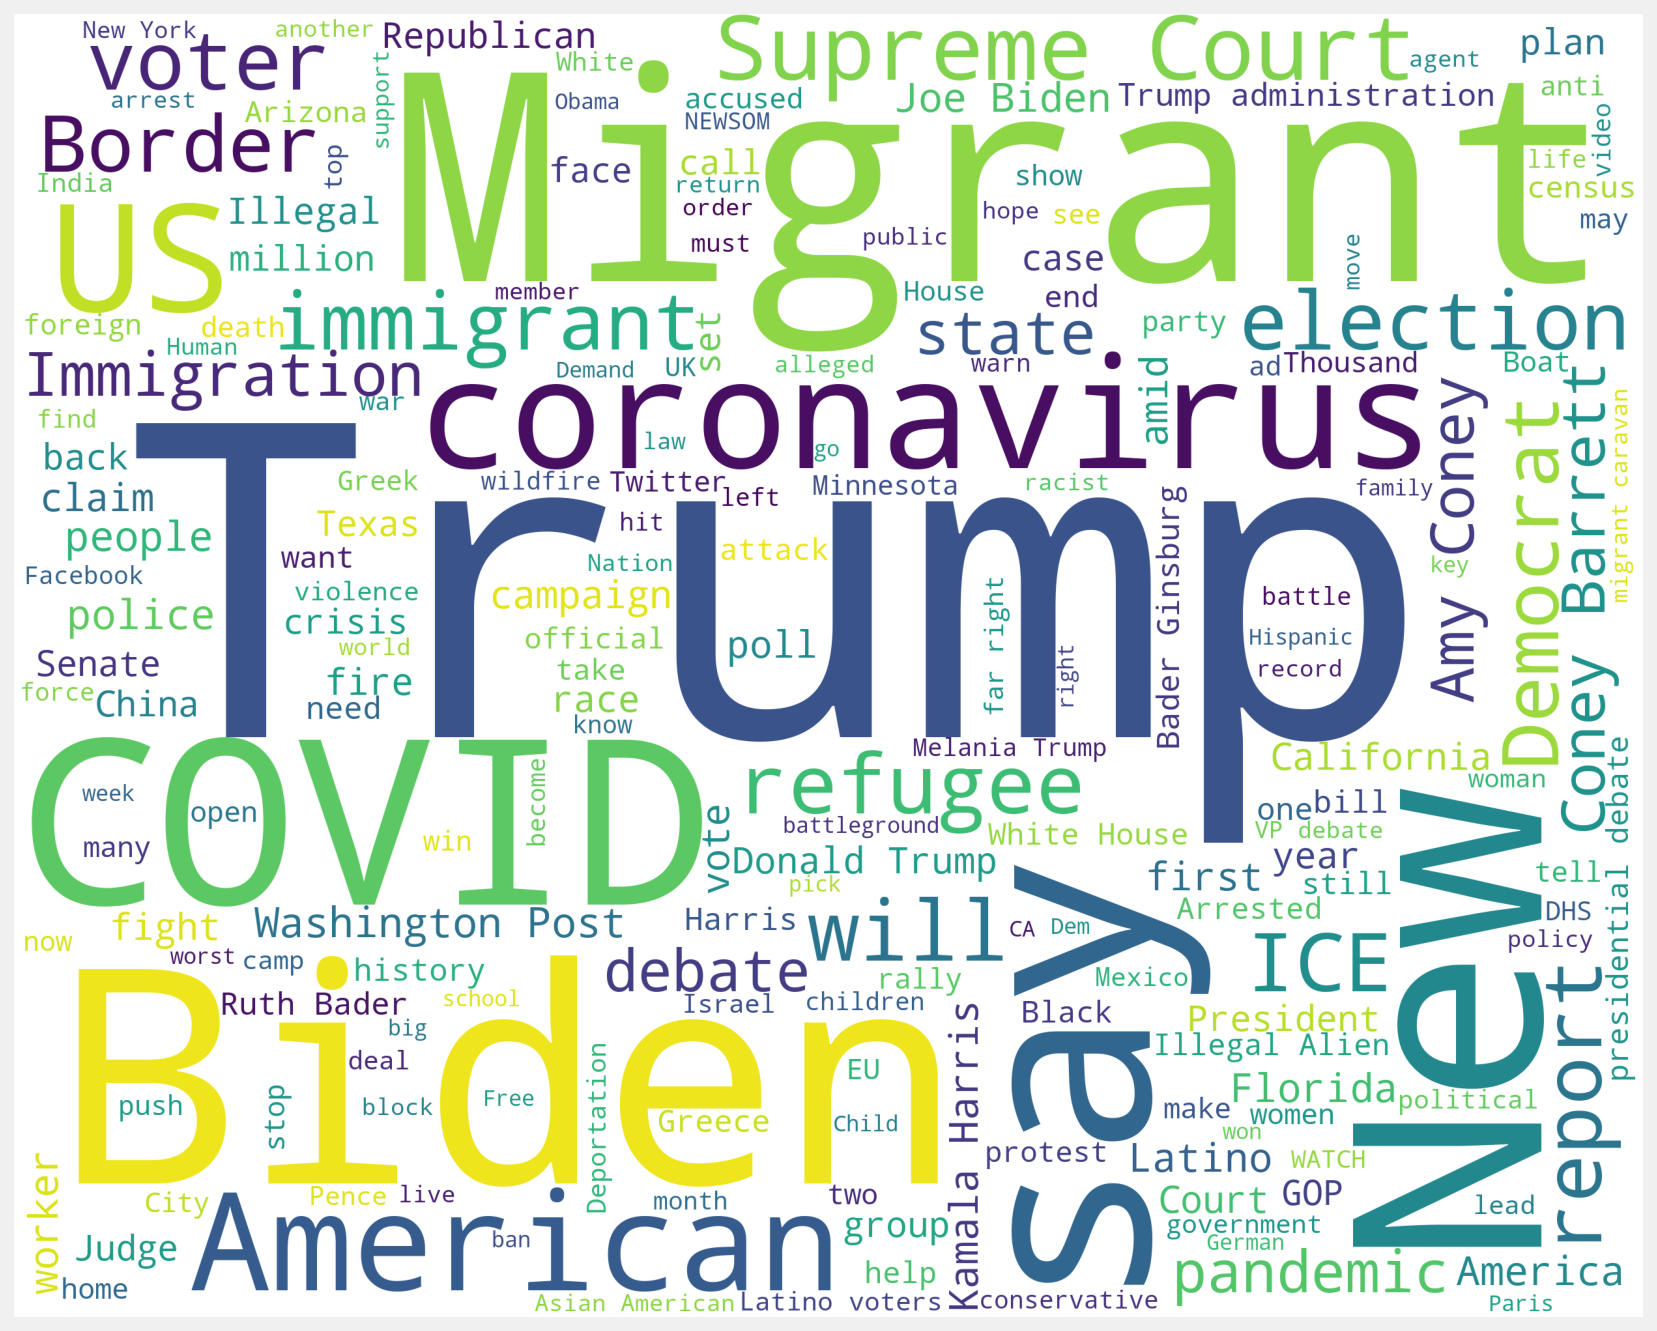

In [42]:
# Pretty word cloud of all headlines
wordcloud_draw(headlines,'white', 'allwhite')

## Sample Headlines

In [43]:
# Save top negative sentiment headlines to CSV file
neg_sort = df[['Source', 'Title', 'compound score']].sort_values(by='compound score').head()
neg_sort.to_csv('../images/topnegativeheadlines.csv')
neg_sort

Source                                              Title  \
93               Fox News  Mackenzie Lueck’s killer pleads guilty to aggr...   
1346       Breitbart News  Kamala Harris Refused Death Penalty for Illega...   
711        Breitbart News  Nigerian Pleads Guilty to Murdering Mackenzie ...   
351              Fox News  ICE deportation flight, objected to by Omar ov...   
996   The Washington Post  The long, dangerous history of right-wing call...   

      compound score  
93           -0.9744  
1346         -0.9524  
711          -0.9403  
351          -0.9231  
996          -0.9022

In [44]:
# Save top positive sentiment headlines to CSV file
pos_sort = df[['Source', 'Title', 'compound score']].sort_values(by='compound score', ascending=False).head()
pos_sort.to_csv('../images/toppositiveheadlines.csv')
pos_sort

Source                                              Title  \
22    The Washington Post  Trump's dream of a Nobel Peace Prize kept aliv...   
963              CBS News  When 60 Minutes met the Nobel Peace Prize winners   
486   The Washington Post  Amy Coney Barrett, a disciple of Justice Scali...   
1303            USA Today  University of Alabama trustees vote to rename ...   
21    The Washington Post  Ruth Bader Ginsburg, Supreme Court justice and...   

      compound score  
22            0.8860  
963           0.8720  
486           0.8402  
1303          0.8271  
21            0.8176